In [2]:
import pandas as pd 
df = pd.read_csv('desktop/data/chocolate_bars.csv')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.dropna()

In [6]:
df.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [7]:
# average rating by country of origin 
rating_by_ori = (df.groupby("bean_origin").rating.mean().reset_index().sort_values(by = "rating" , ascending = False))
rating_by_ori

,bean_origin,rating
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
53,Thailand,3.300000
...,...,...
30,Martinique,2.750000
43,Sierra Leone,2.750000
38,Principe,2.750000
47,St.Vincent-Grenadines,2.750000


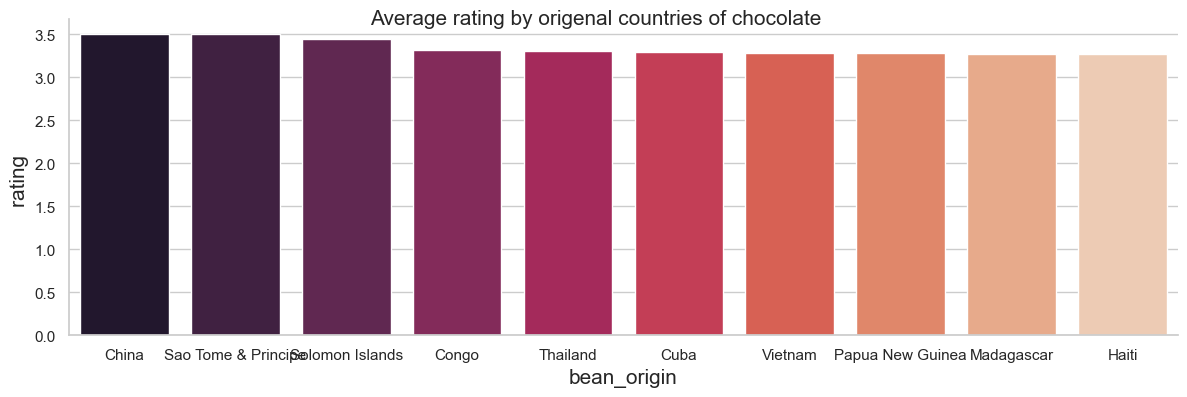

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
sns.catplot(x = 'bean_origin', y = 'rating', kind = 'bar', height = 4, aspect = 3,
            palette = "rocket",
            data = rating_by_ori[0:10]).fig.suptitle("Average rating by origenal countries of chocolate",fontsize=15);
plt.xlabel('bean_origin', fontsize=15)
plt.ylabel('rating ', fontsize=15)
plt.show()

In [11]:
#number of bars of each country of orign
bars_num_ori = (df.groupby("bean_origin").bar_name.count().reset_index().sort_values(by= ["bar_name"] , ascending = False))
bars_num_ori


,bean_origin,bar_name
60,Venezuela,246
36,Peru,231
13,Dominican Republic,220
14,Ecuador,201
28,Madagascar,171
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


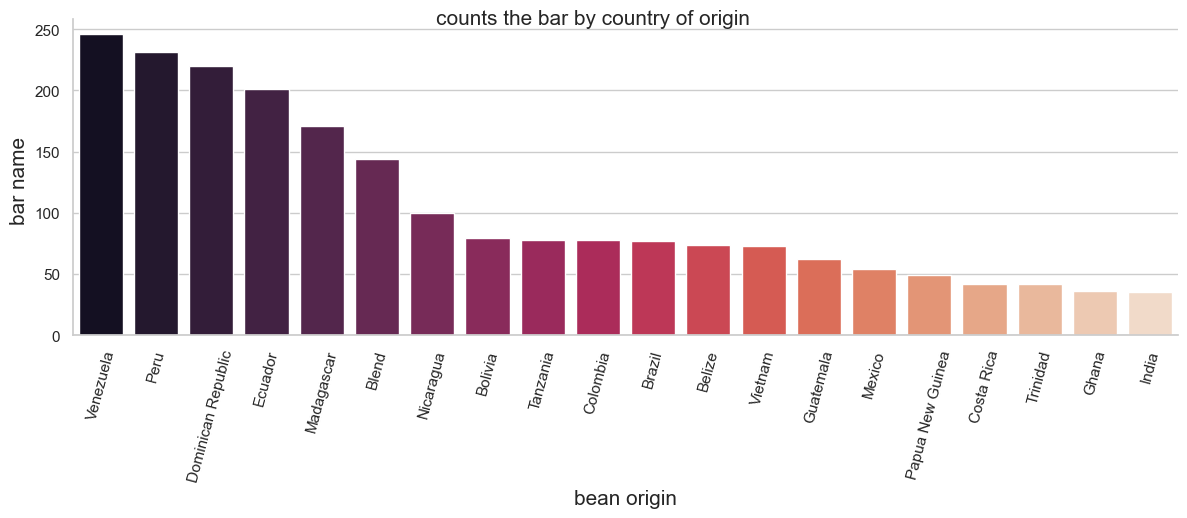

In [15]:
sns.set(style='whitegrid')
sns.catplot(x = 'bean_origin', y = 'bar_name', kind = 'bar', height = 4, aspect = 3,
            palette = "rocket",
            data = bars_num_ori[0:20]).fig.suptitle("counts the bar by country of origin ",fontsize=15);
plt.xlabel('bean origin', fontsize=15)
plt.ylabel('bar name ', fontsize=15)
plt.xticks( rotation = 75)
plt.show()

In [26]:
corr = df.select_dtypes(include =["int","float"]).corr()
corr


,id,year_reviewed,cocoa_percent,num_ingredients,rating
id,1.000000,0.993091,0.047576,-0.356845,0.085569
year_reviewed,0.993091,1.000000,0.048043,-0.362956,0.087774
cocoa_percent,0.047576,0.048043,1.000000,-0.187468,-0.077173
num_ingredients,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,0.085569,0.087774,-0.077173,-0.098834,1.000000


In [49]:
rating_by_ca = (df.groupby("rating").cocoa_percent.mean().round(2).reset_index().sort_values(by = "cocoa_percent" , ascending = False))
rating_by_ca.head(20)

,rating,cocoa_percent
1,1.50,75.60
3,2.00,73.69
0,1.00,73.00
4,2.25,72.93
2,1.75,72.00
6,2.75,71.88
7,3.00,71.73
5,2.50,71.71
8,3.25,71.43
9,3.50,71.23


<Axes: xlabel='rating', ylabel='cocoa_percent'>

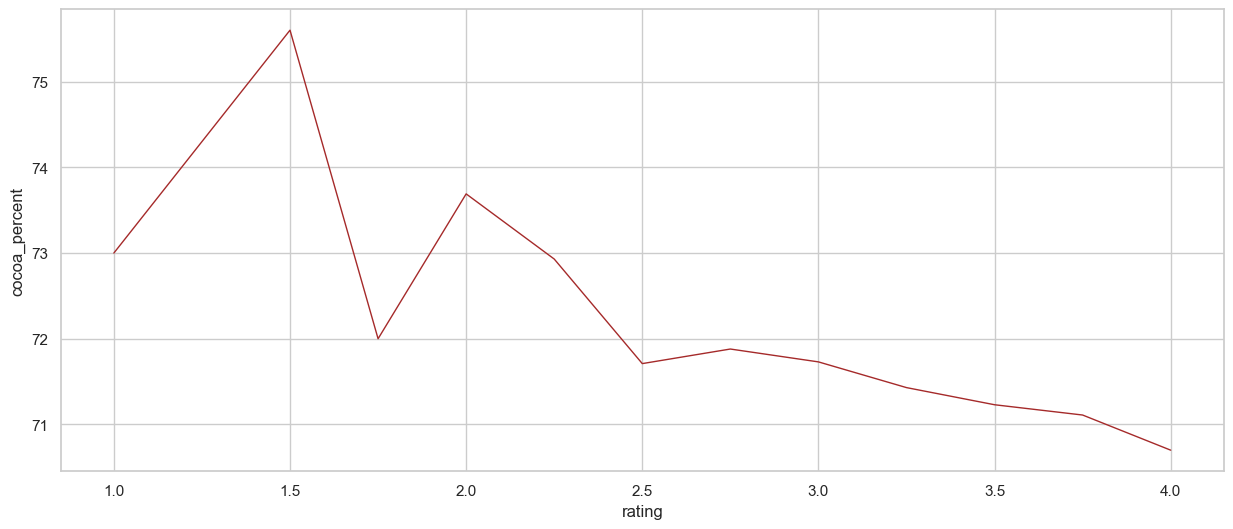

In [52]:
fig = plt.subplots(1, 1, figsize=(15, 6))
sns.lineplot(x='rating', y='cocoa_percent', data=rating_by_ca\
              ,errorbar=('ci', 0), color = 'brown', linewidth=1 )

In [47]:
# avarage rating for cocaco precent above 3.5%
df[df["rating"]>= 3.5].cocoa_percent.mean()

71.13048016701461

In [63]:
#the avarage rating bars with and without lecithin 
import numpy as pd
avg_rating_with_L = df[df["ingredients"].str.contains("L")].rating.mean()
avg_rating_without_L = df[~df["ingredients"].str.contains("L")].rating.mean()
print("the avarage rating bars with lecithin is " , avg_rating_with_L)
print("the avarage rating bars without lecithin is " ,avg_rating_without_L)

the avarage rating bars with lecithin is  3.150608519269777
the avarage rating bars without lecithin is  3.2251282051282053


In [79]:
#chocolate bars reviewed every year
choco_year = df.groupby("year_reviewed").bar_name.count().reset_index().sort_values(by= ["bar_name"] , ascending = False)
choco_year.columns = ["year reviewed","number of bars"]
choco_year

,year reviewed,number of bars
9,2015,280
8,2014,243
12,2018,225
10,2016,213
13,2019,193
6,2012,180
7,2013,177
15,2021,175
5,2011,153
3,2009,113


<Axes: xlabel='year reviewed', ylabel='number of bars'>

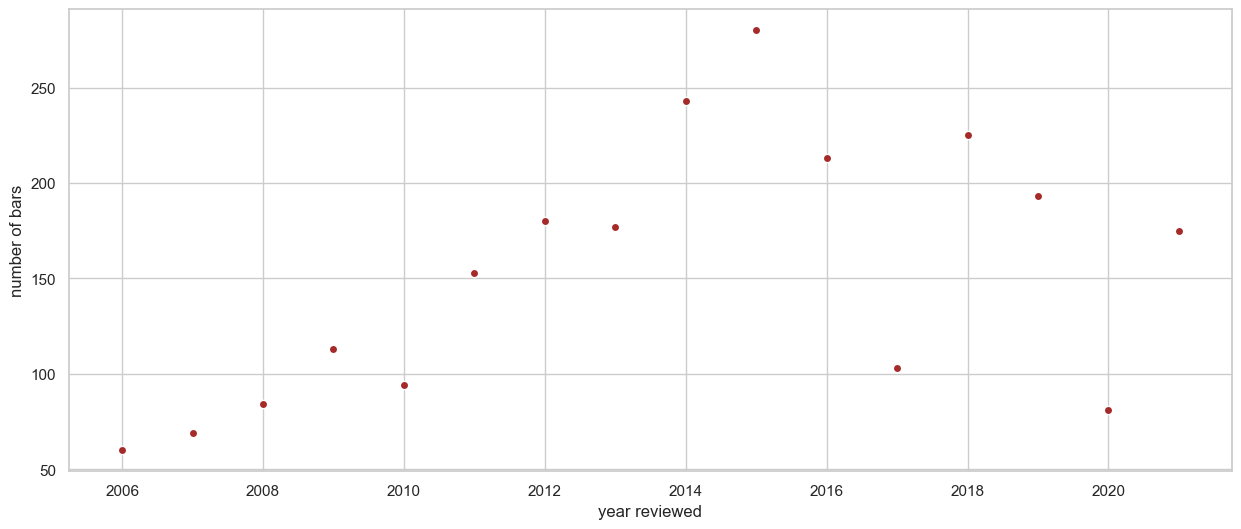

In [80]:
fig = plt.subplots(1, 1, figsize=(15, 6))
sns.scatterplot(x='year reviewed', y='number of bars', data=choco_year\
              , color = 'brown', linewidth=1 )